## Démonstration de SVM (machine à vecteurs de support)
Le SVM est un algorithme qui essaye de trouver le plan qui sépare les différents classes

### Importation des bibliothèques

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

### Chargement du dataset MNIST
Le dataset MNIST est une collection de plus de 70 000 images de chiffres manuscrits.

In [3]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype(np.float32), mnist.target.astype(int)

### Normalisation des données
On va normaliser (transformer les données pour qu'ils restent dans l'intervalle [0; 1]) afin de limiter la taille de graphique, donc améliorer les performances.

In [ ]:
X /= 255.0

### Réduction des caractériques avec PCA
PCA (Principal component analysis) est un algorithme qui permet d'analyser les caractérisques des données, choisir le nombre qu'on veut garder et de choisir les plus pertinants pour la classifications

In [4]:
pca = PCA(n_components=50)  # Ici, on veut garder uniquement 50 caractéristiques
X_pca = pca.fit_transform(X)

### Préparation des données
On prend nos données, on découpe en deux parties :
- une partie entraînement : qui permet l'entrainement du modèle
- une partie test : qui permet de tester l'efficacité du modèle après entrainement

In [5]:
# Ici, on a 80% des données sont pour l'entrainement et le reste (20%) pour le test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Entrainement du classifieur
On utilise le noyau RBF car il est pplus performant sur MNIST.  
Le paramètre `c` permet la régularisation de résultats

In [6]:
svm_model = SVC(kernel='rbf', C=10)  # RBF est souvent plus performant sur MNIST
svm_model.fit(X_train, y_train)

SVC(C=10)

### Prédictions et évaluation
On va faire prédire le classifieur entrainé sur les données de test.  
Ensuite, on va calculer sa justesse afin de voir si notre classifieur est bon

In [7]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"La justesse sur les données de test (SVM après PCA): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

La justesse sur les données de test (SVM après PCA): 98.54%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



### Visualisation en 2D
Dans cette partie, on va réduire le nombre des componsantes à 2.  
Cela va permettre de garder les composantes principales, et surtout, de pouvoir l'afficher sur un graphique 2D.

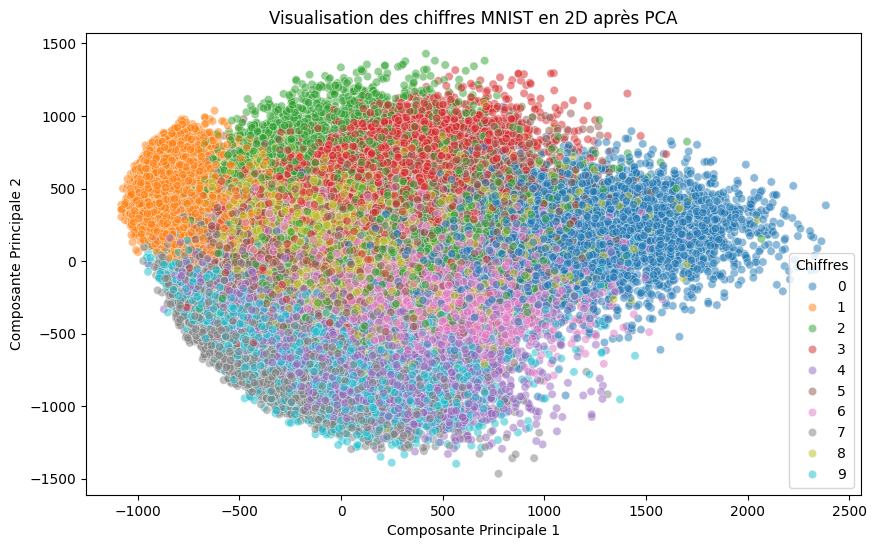

In [8]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", alpha=0.5)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Visualisation des chiffres MNIST en 2D après PCA")
plt.legend(title="Chiffres")
plt.show()